#Project19-To perform EDA and predict the restaurant food cost on the basis of many other factors

In [55]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [56]:
train=pd.read_excel('C:/Users/Arjun Rao/Downloads/hotel/Data_Train.xlsx')
test=pd.read_excel('C:/Users/Arjun Rao/Downloads/hotel/Data_Test.xlsx')
train['type']='train'
test['type']='test'

In [57]:
df_hotel=pd.concat([train,test])
df_hotel

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,type
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test


In [58]:
train.shape, test.shape

((12690, 10), (4231, 9))

In [59]:
#Resetting the index inorder to make our data clean and easier to understand
df_hotel.reset_index(drop=True,inplace=True)

In [60]:
df_hotel.tail()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,type
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
16919,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test
16920,Bandra West,NaN,Mughlai,Perry Cross Road,3.7,2421,5pm – 1am (Mon-Sun),QUICK BITES,63 votes,test


In [61]:
#Checking for null values
df_hotel.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
type                0
dtype: int64

In [62]:
#Checking for missing data
df_hotel.loc[df_hotel['CITY'].isnull()]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,type
129,NaN,500.0,"North Indian, South Indian, Chinese, Continental",NaN,3.6,9101,"12noon – 3pm, 7pm – 2am (Mon-Sun)",None,728 votes,train
246,NaN,300.0,Biryani,Palarivattom Kochi,3.4,14502,12noon – 11pm (Mon-Sun),QUICK BITES,82 votes,train
411,NaN,600.0,"North Indian, Chinese, Pizza, Burger, Fast Food",NaN,4.0,6313,7pm – 4am (Mon-Sun),None,29 votes,train
466,NaN,200.0,North Indian,NaN,4.2,1133,4pm – 9pm (Mon-Sun),None,55 votes,train
481,NaN,250.0,Street Food,NaN,3.7,4788,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",None,616 votes,train
...,...,...,...,...,...,...,...,...,...,...
16311,NaN,NaN,"Continental, Mexican, American",Maharashtra 400013,4.0,9779,5pm – 1:30am (Mon-Sun),"PUB,CASUAL DINING",1142 votes,test
16313,NaN,NaN,"North Indian, South Indian, Chinese, Biryani",NaN,3.5,5922,6am – 11:30pm (Mon-Sun),CASUAL DINING,102 votes,test
16803,NaN,NaN,"Fast Food, Italian, Pizza, Sandwich",NaN,3.7,4748,1pm – 8am (Mon-Sun),None,27 votes,test
16815,NaN,NaN,"Chinese, North Indian",NaN,3.5,8587,"11:45am – 3:30pm, 7:30pm – 11:40pm (Mon, Sat)...",QUICK BITES,25 votes,test


We can see that most of city and locality have null values paralley , we have to fill these values with 'missing'

In [63]:
import numpy as np
import math
null_city=df_hotel.loc[df_hotel["CITY"].isnull()].index
for index in null_city :
    try:
        if math.isnan(df_hotel["CITY"].iloc[index]) and math.isnan(df_hotel["LOCALITY"].iloc[index]):
            df_hotel["CITY"].iloc[index]="missing"
            df_hotel["LOCALITY"].iloc[index]="missing"
    except:
        pass

In [64]:
# checking null values
df_hotel.isnull().sum()

CITY               20
COST             4231
CUISINES            0
LOCALITY            1
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
type                0
dtype: int64

In [65]:
df_hotel.loc[df_hotel["CITY"].isnull()]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,type
246,NaN,300.0,Biryani,Palarivattom Kochi,3.4,14502,12noon – 11pm (Mon-Sun),QUICK BITES,82 votes,train
817,NaN,1200.0,"Thai, Chinese, Continental, North Indian, Italian",shop 7 shikrupa socity,4.1,1042,12noon – 12midnight (Mon-Sun),CASUAL DINING,486 votes,train
5149,NaN,400.0,"Beverages, Ice Cream, Desserts",Navi Mumbai,3.8,7264,11am – 11pm (Mon-Sun),"BEVERAGE SHOP,DESSERT PARLOR",163 votes,train
5297,NaN,1000.0,Continental,Kochi,3.4,1030,24 Hours (Mon-Sun),CASUAL DINING,19 votes,train
6397,NaN,950.0,"Cafe, American, Asian, Bakery, Biryani, Chines...",Alibaug,4.2,7334,9am – 9:30pm (Mon-Sun),CAFÉ,253 votes,train
6451,NaN,400.0,Bakery,Chennai,3.5,2595,10am – 10pm (Mon-Sun),BAKERY,10 votes,train
8456,NaN,150.0,"Fast Food, Beverages",Mathikere,3.7,12367,9:30am – 11pm (Mon-Sun),QUICK BITES,28 votes,train
8735,NaN,400.0,"Chinese, Burger",Chennai,3.8,15526,11am – 11pm (Mon-Sun),CASUAL DINING,284 votes,train
9121,NaN,1500.0,"Finger Food, American, Continental, Burger, Pizza",Bangalore,3.9,9800,11am – 1am (Mon-Sun),"PUB,CASUAL DINING",557 votes,train
9268,NaN,200.0,Lebanese,Kochi,3.4,12021,11am – 11pm (Mon-Sun),QUICK BITES,14 votes,train


We can see that we have some CITY names present in LOCALITY, we need to correct it 

In [66]:
#Collecting CITY unique list 
city_list=df_hotel["CITY"].drop_duplicates().to_list()

In [67]:
null_city=df_hotel.loc[df_hotel["CITY"].isnull()].index

In [68]:
#Copying CITY name from LOCALITY
for index in null_city:
    for city in city_list:
        if city in df_hotel["LOCALITY"].iloc[index].split():
            df_hotel["CITY"].iloc[index]=city

In [69]:
df_hotel.isnull().sum()

CITY                5
COST             4231
CUISINES            0
LOCALITY            1
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
type                0
dtype: int64

In [70]:
# Filling/Replacing these values with "missing"
df_hotel["CITY"].fillna("missing",inplace=True)
df_hotel["LOCALITY"].fillna("missing",inplace=True)

In [71]:
df_hotel.isnull().sum()

CITY                0
COST             4231
CUISINES            0
LOCALITY            0
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
type                0
dtype: int64

In [72]:
# Checking for null values in VOTES
df_hotel.loc[df_hotel["VOTES"].isnull()]

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,type
13,Kochi,400.0,South Indian,Edappally,-,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,NaN,train
62,Kochi,200.0,"North Indian, Beverages",Kalamassery,NEW,7841,11am – 11pm (Mon-Sun),QUICK BITES,NaN,train
69,New Delhi,200.0,"Pizza, Fast Food",Kalkaji,NEW,11096,11am – 11pm (Mon-Sun),None,NaN,train
85,Bangalore,300.0,"North Indian, South Indian",Vijay Nagar,-,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,NaN,train
111,Mumbai,800.0,"Gujarati, Rajasthani, North Indian",Borivali West,NEW,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,NaN,train
...,...,...,...,...,...,...,...,...,...,...
16873,Noida,NaN,"Cafe, North Indian",Sector 63,NEW,7007,11am – 11pm (Mon-Sun),CAFÉ,NaN,test
16875,New Delhi,NaN,Fast Food,Shalimar Bagh,NEW,6387,12:30pm – 10:30pm (Mon-Sun),QUICK BITES,NaN,test
16888,Bangalore,NaN,Continental,Indiranagar,NEW,13381,11am – 12midnight (Mon-Sun),QUICK BITES,NaN,test
16913,Mumbai,NaN,"Sindhi, Street Food",Lower Parel,NEW,6887,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",CASUAL DINING,NaN,test


We can see that we have null values for votes where restaurant is NEW

In [81]:
# Filling this Nan values with 0
df_hotel["VOTES"].fillna(0,inplace=True)

In [74]:
df_hotel.isnull().sum()

CITY                0
COST             4231
CUISINES            0
LOCALITY            0
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
type                0
dtype: int64

In [75]:
# Checking for null and unique values in RATING
df_hotel["RATING"].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

We have to remove/replace these NEW,-,nan values

In [76]:
df_hotel["RATING"].replace("NEW",0,inplace=True)
df_hotel["RATING"].replace("-",0,inplace=True)
df_hotel["RATING"].fillna(0,inplace=True)

In [77]:
df_hotel.isnull().sum()

CITY                0
COST             4231
CUISINES            0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
type                0
dtype: int64

Now we have left with only COST values of Test data, which we have to predict

In [78]:
df_hotel.dtypes

CITY              object
COST             float64
CUISINES          object
LOCALITY          object
RATING            object
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES             object
type              object
dtype: object

In [79]:
df_hotel["RATING"]=df_hotel["RATING"].astype(float)

In [83]:
#Striping off " votes" and changing datatype of VOTES column
df_hotel["VOTES"]=df_hotel["VOTES"].str.strip("votes")

In [84]:
df_hotel["VOTES"].unique

<bound method Series.unique of 0         49 
1         30 
2        221 
3         24 
4        165 
         ... 
16916    287 
16917    469 
16918     53 
16919     NaN
16920     63 
Name: VOTES, Length: 16921, dtype: object>

In [85]:
df_hotel["VOTES"].fillna(0,inplace=True)

In [87]:
df_hotel["VOTES"]=df_hotel["VOTES"].astype(int)

In [88]:
df_hotel.dtypes

CITY              object
COST             float64
CUISINES          object
LOCALITY          object
RATING           float64
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES              int32
type              object
dtype: object

In [89]:
#Dropping Unnessary datas 
df_hotel.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)

In [90]:
df_hotel.head()

,CITY,COST,CUISINES,LOCALITY,RATING,TITLE,VOTES,type
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,CASUAL DINING,49,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,"CASUAL DINING,BAR",30,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,CASUAL DINING,221,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,QUICK BITES,24,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,DESSERT PARLOR,165,train


We have now CUISINES column which have multiple information, we need to separte these

In [92]:
# Checking the Maximum and Minimum number of CUISINES
cui = df_hotel.CUISINES.apply(lambda x: len(x.split(',')))
print("Maximum no of cuisines in the Train dataset is {}\n".format(cui.max()))
print("And cuisines are --> {}\n\n".format(df_hotel.CUISINES[cui.idxmax()]))
print("Minimum no of cuisines in the in the Train dataset is {}\n".format(cui.min()))
print("And the cuisines is/are --> {}\n\n".format(df_hotel.CUISINES[cui.idxmin()]))

Maximum no of cuisines in the Train dataset is 8

And cuisines are --> Continental, American, Asian, North Indian, Chinese, Pizza, Biryani,


Minimum no of cuisines in the in the Train dataset is 1

And the cuisines is/are --> Desserts




In [94]:
#Assigning new columns to each type of cuisines
df_hotel['cui_1'] = df_hotel['CUISINES'].str.split(',').str[0]
df_hotel['cui_2'] = df_hotel['CUISINES'].str.split(',').str[1]
df_hotel['cui_3'] = df_hotel['CUISINES'].str.split(',').str[2]
df_hotel['cui_4'] = df_hotel['CUISINES'].str.split(',').str[3]
df_hotel['cui_5'] = df_hotel['CUISINES'].str.split(',').str[4]
df_hotel['cui_6'] = df_hotel['CUISINES'].str.split(',').str[5]
df_hotel['cui_7'] = df_hotel['CUISINES'].str.split(',').str[6]
df_hotel['cui_8'] = df_hotel['CUISINES'].str.split(',').str[7]

In [95]:
df_hotel.drop(columns=["CUISINES"],inplace=True)

In [96]:
df_hotel.head()

,CITY,COST,LOCALITY,RATING,TITLE,VOTES,type,cui_1,cui_2,cui_3,cui_4,cui_5,cui_6,cui_7,cui_8
0,Thane,1200.0,Dombivali East,3.6,CASUAL DINING,49,train,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,Chennai,1500.0,Ramapuram,4.2,"CASUAL DINING,BAR",30,train,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,Chennai,800.0,Saligramam,3.8,CASUAL DINING,221,train,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN
3,Mumbai,800.0,Bandra West,4.1,QUICK BITES,24,train,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
4,Mumbai,300.0,Lower Parel,3.8,DESSERT PARLOR,165,train,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have now TITLE column which have multiple information, we need to separte these also

In [97]:
# Checking the Maximum and Minimum number of CUISINES
cui = df_hotel.TITLE.apply(lambda x: len(x.split(',')))
print("Maximum no of titles in the Train dataset is {}\n".format(cui.max()))
print("And titles are --> {}\n\n".format(df_hotel.TITLE[cui.idxmax()]))
print("Minimum no of titles in the in the Train dataset is {}\n".format(cui.min()))
print("And the title is/are --> {}\n\n".format(df_hotel.TITLE[cui.idxmin()]))

Maximum no of titles in the Train dataset is 2

And titles are --> CASUAL DINING,BAR


Minimum no of titles in the in the Train dataset is 1

And the title is/are --> CASUAL DINING




In [98]:
#Assigning new columns to each type of Titles
df_hotel['tit_1'] = df_hotel['TITLE'].str.split(',').str[0]
df_hotel['tit_2'] = df_hotel['TITLE'].str.split(',').str[1]

In [100]:
df_hotel.drop(columns=["TITLE"],inplace=True)

In [101]:
df_hotel.head()

,CITY,COST,LOCALITY,RATING,VOTES,type,cui_1,cui_2,cui_3,cui_4,cui_5,cui_6,cui_7,cui_8,tit_1,tit_2
0,Thane,1200.0,Dombivali East,3.6,49,train,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN,CASUAL DINING,NaN
1,Chennai,1500.0,Ramapuram,4.2,30,train,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN,CASUAL DINING,BAR
2,Chennai,800.0,Saligramam,3.8,221,train,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN,CASUAL DINING,NaN
3,Mumbai,800.0,Bandra West,4.1,24,train,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN,QUICK BITES,NaN
4,Mumbai,300.0,Lower Parel,3.8,165,train,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DESSERT PARLOR,NaN


In [117]:
#Replacing null values of cuisins and tital columns to None
df_hotel['cui_2'].fillna("None",inplace=True)
df_hotel['cui_3'].fillna("None",inplace=True)
df_hotel['cui_4'].fillna("None",inplace=True)
df_hotel['cui_5'].fillna("None",inplace=True)
df_hotel['cui_6'].fillna("None",inplace=True)
df_hotel['cui_7'].fillna("None",inplace=True)
df_hotel['cui_8'].fillna("None",inplace=True)
df_hotel['tit_2'].fillna("None",inplace=True)

In [118]:
df_hotel.isnull().sum()

CITY           0
COST        4231
LOCALITY       0
RATING         0
VOTES          0
type           0
cui_1          0
cui_2          0
cui_3          0
cui_4          0
cui_5          0
cui_6          0
cui_7          0
cui_8          0
tit_1          0
tit_2          0
dtype: int64

We can see that we have now the needed data to perfom EDA and to train our model for prediction

--Performing graphical EDA for the above data to get insight of data--

In [102]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

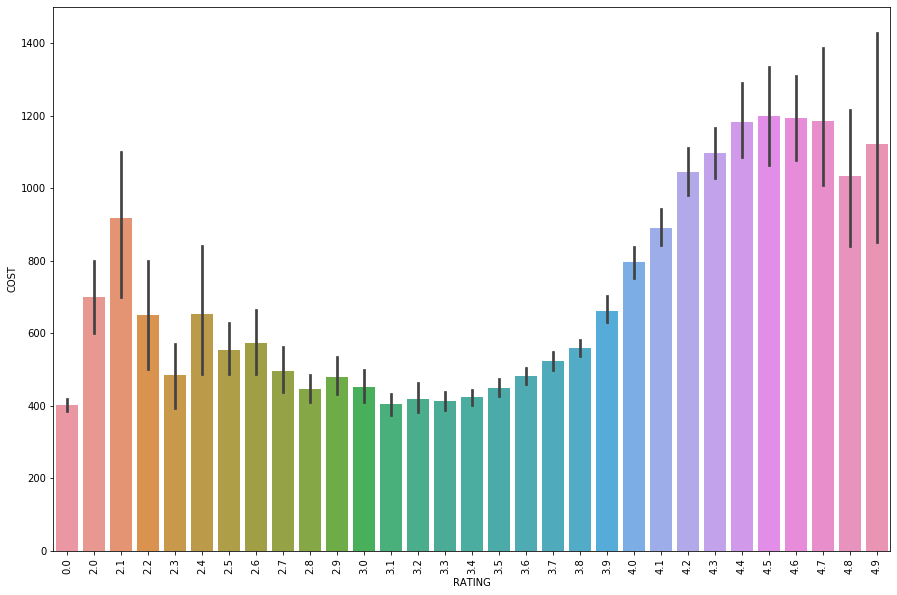

In [107]:
plt.figure(figsize=(15,10))
sns.barplot(x="RATING",y="COST",data=df_hotel)
plt.xticks(rotation=90)
plt.show()

We can see that higher the ratings, higher the prices of food in restaurants/hotels

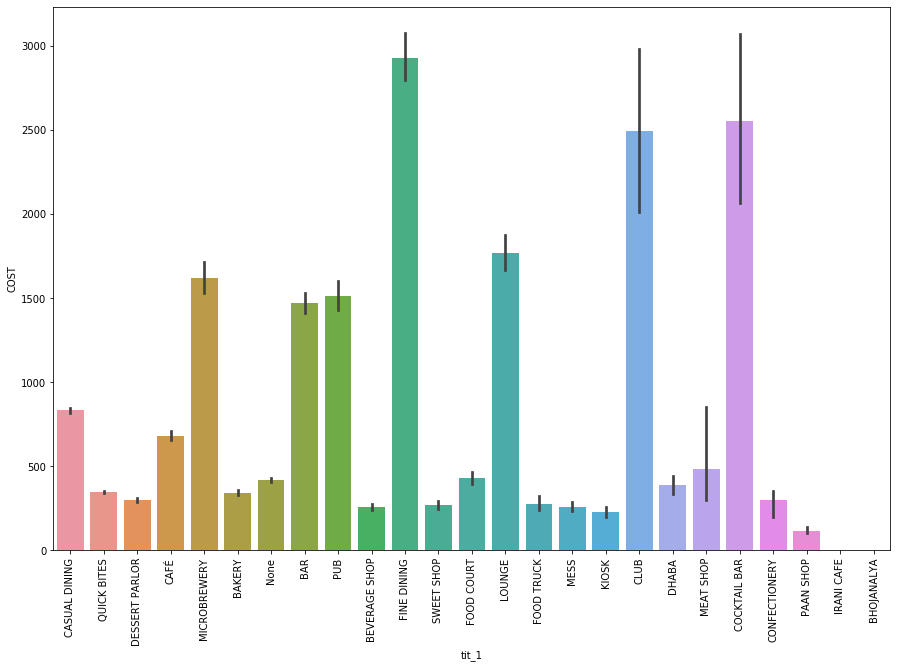

In [113]:
plt.figure(figsize=(15,10))
sns.barplot(x="tit_1",y="COST",data=df_hotel)
plt.xticks(rotation=90)
plt.show()

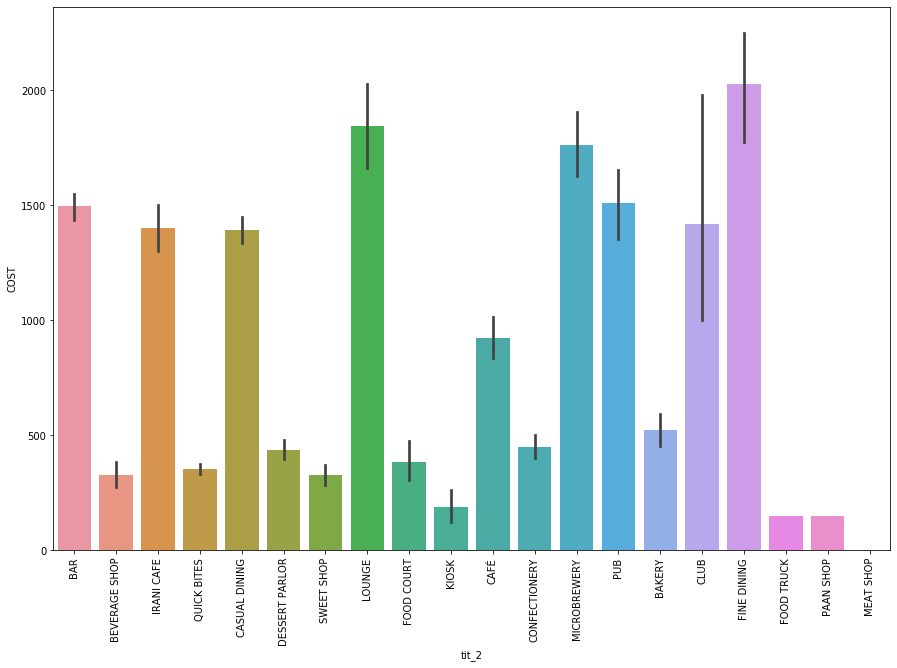

In [114]:
plt.figure(figsize=(15,10))
sns.barplot(x="tit_2",y="COST",data=df_hotel)
plt.xticks(rotation=90)
plt.show()

We can see that Restaurant have title "FINE DINING" are costliest

In [119]:
#Encoding the data using Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in df_hotel.columns:
    if df_hotel[col].dtype=="object":
        df_hotel[col]=LabelEncoder().fit_transform(df_hotel[col])

In [122]:
#Separating train and test data
df_train=df_hotel.loc[df_hotel["type"]==1]
df_test=df_hotel.loc[df_hotel["type"]==0]

In [123]:
#Resetting the index
df_test.reset_index(drop=True,inplace=True)

In [124]:
#Dropping the type column
df_train.drop(columns=["type"],inplace=True)
df_test.drop(columns=["type"],inplace=True)

In [125]:
#Separating the input and output from train dataset
df_x=df_train.drop(columns=["COST"])
y=df_train[["COST"]]

In [126]:
#Performing scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [127]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [128]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [129]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [130]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,random_state=42)

In [131]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.24994474303473135 corresponding to random state:  67


In [132]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.4054649388797682 corresponding to random state:  57


In [133]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.7370869499667827 corresponding to random state:  46


In [134]:
AB=AdaBoostRegressor()
maxr2_score(AB,x,y)

max r2 score is :  0.29922385810329755 corresponding to random state:  69


In [135]:
GB=GradientBoostingRegressor()
maxr2_score(GB,x,y)

max r2 score is :  0.7371275571626545 corresponding to random state:  91


In [139]:
#Using Grid search CV for best parameters to improve the r2 score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
RF=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(RF, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [140]:
RF=RandomForestRegressor(n_estimators= 100)
maxr2_score(RF,x,y)

max r2 score is :  0.7529812692534694 corresponding to random state:  93


In [141]:

GB=GradientBoostingRegressor()
parameters =parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]}
clf = GridSearchCV(GB,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [142]:
GB=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)
maxr2_score(GB,x,y)

max r2 score is :  0.7689873447911182 corresponding to random state:  94


We can see that we have imporved r2 score and maximum is given by Gradient Boosting technuque

In [150]:
c_scores=cross_val_score(GB,x,y,cv=5,scoring="r2")
print("Mean r2 score for regressor: ",c_scores.mean())
print("standard deviation in r2 score for regressor: ",c_scores.std())

Mean r2 score for regressor:  0.726487932819151
standard deviation in r2 score for regressor:  0.04016813707204008


In [143]:
#We have to remove the COST(null) column from our test dataset in order to predict the fees using our final model
df_test.drop(columns=['COST'],axis=1,inplace=True)

In [144]:
df_test.head(2)

,CITY,LOCALITY,RATING,VOTES,cui_1,cui_2,cui_3,cui_4,cui_5,cui_6,cui_7,cui_8,tit_1,tit_2
0,323,1314,4.3,564,74,23,67,43,83,75,57,22,5,16
1,277,429,4.2,61,92,28,77,64,83,75,57,22,23,16


In [145]:
#Saving our final model using Gradient Boosting Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=94,test_size=0.20)
GB.fit(train_x,train_y)
pred_food_cost=GB.predict(df_test)

In [146]:
pred_food_cost=pd.DataFrame(pred_food_cost,columns=["COST"])

In [147]:
#saving our predicted COST column to the system

pred_food_cost.to_csv('C:/Users/Arjun Rao/Downloads/predicted_food_cost.csv',index=False)

**This is we have saved the prdicted food cost file to the system**